In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import tensorflow 
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.7f}'.format

In [2]:
import h5py
svhn = h5py.File('Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5')
svhn.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [3]:
# Data Pre-processing 
#Load Train and Test set
X_train = svhn['X_train'][:]
y_train = svhn['y_train'][:]
X_test = svhn['X_test'][:]
y_test = svhn['y_test'][:]

In [4]:
X_train.shape

(42000, 32, 32)

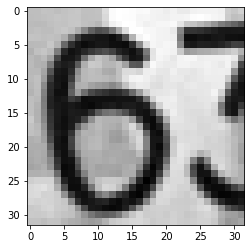

In [5]:
plt.imshow(X_train[1], cmap='gray')
plt.show()

In [6]:
# Normalizing the dataset, dividing by 255.Since gray scale images range from 0 to 255

_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)

X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(42000, 32, 32) (42000,)
(18000, 1024, 1) (18000,)


In [7]:
# Hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

nums = y_test.shape[1] 
print(nums)

10


Neural Network Image Classifier

In [8]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def nn_model():
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) 
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(nums, activation='softmax'))
    return model

model = nn_model()

In [9]:
opt = optimizers.Nadam(lr=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 

In [10]:
# Fitting

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)

Epoch 1/100
140/140 - 1s - loss: 2.3034 - accuracy: 0.1079 - val_loss: 2.2797 - val_accuracy: 0.1482
Epoch 2/100
140/140 - 1s - loss: 2.2609 - accuracy: 0.1428 - val_loss: 2.1168 - val_accuracy: 0.2278
Epoch 3/100
140/140 - 1s - loss: 2.0392 - accuracy: 0.2643 - val_loss: 2.0242 - val_accuracy: 0.2351
Epoch 4/100
140/140 - 1s - loss: 1.6776 - accuracy: 0.4161 - val_loss: 1.5672 - val_accuracy: 0.4516
Epoch 5/100
140/140 - 1s - loss: 1.4854 - accuracy: 0.4953 - val_loss: 1.4094 - val_accuracy: 0.5236
Epoch 6/100
140/140 - 1s - loss: 1.3498 - accuracy: 0.5532 - val_loss: 1.2198 - val_accuracy: 0.6194
Epoch 7/100
140/140 - 1s - loss: 1.2750 - accuracy: 0.5819 - val_loss: 1.1800 - val_accuracy: 0.6271
Epoch 8/100
140/140 - 1s - loss: 1.2030 - accuracy: 0.6120 - val_loss: 1.1472 - val_accuracy: 0.6292
Epoch 9/100
140/140 - 2s - loss: 1.1326 - accuracy: 0.6392 - val_loss: 1.1229 - val_accuracy: 0.6395
Epoch 10/100
140/140 - 1s - loss: 1.0903 - accuracy: 0.6535 - val_loss: 1.0401 - val_accura

In [11]:
# Scores

scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss=", scores[0])
print("Accuracy=", scores[1])

Loss= 0.6662746667861938
Accuracy= 0.8171111345291138


Out of 8 operators that i have checked,
 there are 4 operators with more than 80 % Accuracy.
 
(Adamax: Loss= 0.683, Accuracy= 0.808)

(Adam: Loss= 0.682, Accuracy= 0.810)

(RMSprop: Loss= 0.673, Accuracy= 0.802)

(Nadam: Loss= 0.666, Accuracy= 0.817)

Text(0.5, 1.0, 'Training and validation loss')

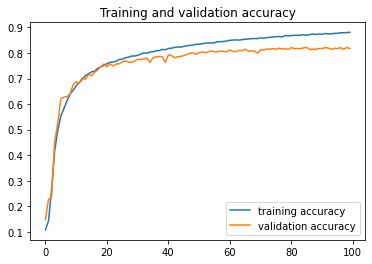

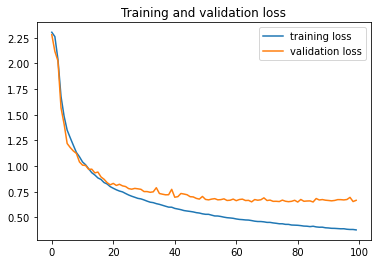

In [12]:
accuracy      = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(accuracy))

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

* At a certain point, we could say that our model is being   overfit, as we can see that the vaildation loss is         increasing.